# **Частина перша: Знайомство з Pandas**

1. Вивести перші рядки таблиці за допомогою методу head:

In [54]:
import pandas as pd
import numpy as np

df = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96",
                  attrs={"class":"wikitable sortable"})
df=df[0]
print(df.head())

                      регіон   1950   1960   1970  1990  1992  1994  1996  \
0  Автономна Республіка Крим  230.0  206.0  160.0   130   109    93    80   
1          Вінницька область  224.0  192.0  142.0   124   119   107   103   
2          Волинська область  247.0  250.0  179.0   153   150   137   125   
3   Дніпропетровська область  204.0  204.0  151.0   123   106    92    80   
4           Донецька область  271.0  214.0  140.0   109    94    82    70   

   2000  2004  2008  2012   2014  
0    73    90   119   126    NaN  
1    84    90   108   112  109.0  
2   112   119   148   148  141.0  
3    71    89   110   112  111.0  
4    61    76    98    98   82.0  


2. Визначте кількість рядків та стовпців у датафреймі (атрибут shape):

In [35]:

print(f"Кількість рядків: {df.shape[0]}\nКількість стовпців: {df.shape[1]}")

Кількість рядків: 28
Кількість стовпців: 13


3. Замініть у таблиці значення "—" на значення NaN

In [55]:
df.replace(to_replace="—",
           value=np.nan,
           inplace=True)
print(df)

                       регіон   1950   1960   1970  1990  1992  1994  1996  \
0   Автономна Республіка Крим  230.0  206.0  160.0   130   109    93    80   
1           Вінницька область  224.0  192.0  142.0   124   119   107   103   
2           Волинська область  247.0  250.0  179.0   153   150   137   125   
3    Дніпропетровська область  204.0  204.0  151.0   123   106    92    80   
4            Донецька область  271.0  214.0  140.0   109    94    82    70   
5         Житомирська область  261.0  223.0  159.0   129   128   118   108   
6        Закарпатська область  314.0  273.0  207.0   168   161   138   128   
7          Запорізька область  219.0  197.0  150.0   124   107    92    81   
8   Івано-Франківська область  243.0  248.0  182.0   155   144   131   122   
9            Київська область  204.0  189.0  156.0   123   111    99    92   
10     Кіровоградська область  216.0  171.0  145.0   126   119   107    96   
11          Луганська область  262.0  235.0  144.0   116   101  

4. Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [49]:
type_column = df.dtypes
print(type_column)

регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
1992        int64
1994        int64
1996        int64
2000        int64
2004        int64
2008        int64
2012        int64
2014      float64
dtype: object


5. Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—".

Змінимо всі колонки в яких тип int64 на float64

In [57]:
df = df.astype(float, errors='ignore')

print(df.dtypes)

регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
1992      float64
1994      float64
1996      float64
2000      float64
2004      float64
2008      float64
2012      float64
2014      float64
dtype: object


6. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [63]:
print(df.isnull().sum())


регіон    0
1950      2
1960      1
1970      1
1990      0
1992      0
1994      0
1996      0
2000      0
2004      0
2008      0
2012      0
2014      2
dtype: int64


7. Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [67]:
df.drop(df.index[-1], inplace=True)
print(df)

                       регіон   1950   1960   1970   1990   1992   1994  \
0   Автономна Республіка Крим  230.0  206.0  160.0  130.0  109.0   93.0   
1           Вінницька область  224.0  192.0  142.0  124.0  119.0  107.0   
2           Волинська область  247.0  250.0  179.0  153.0  150.0  137.0   
3    Дніпропетровська область  204.0  204.0  151.0  123.0  106.0   92.0   
4            Донецька область  271.0  214.0  140.0  109.0   94.0   82.0   
5         Житомирська область  261.0  223.0  159.0  129.0  128.0  118.0   
6        Закарпатська область  314.0  273.0  207.0  168.0  161.0  138.0   
7          Запорізька область  219.0  197.0  150.0  124.0  107.0   92.0   
8   Івано-Франківська область  243.0  248.0  182.0  155.0  144.0  131.0   
9            Київська область  204.0  189.0  156.0  123.0  111.0   99.0   
10     Кіровоградська область  216.0  171.0  145.0  126.0  119.0  107.0   
11          Луганська область  262.0  235.0  144.0  116.0  101.0   84.0   
12          Львівська обл

8. Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [75]:
df = df.fillna(df.mean(numeric_only=True))

print(df.round(2))

                       регіон    1950    1960   1970   1990   1992   1994  \
0   Автономна Республіка Крим  230.00  206.00  160.0  130.0  109.0   93.0   
1           Вінницька область  224.00  192.00  142.0  124.0  119.0  107.0   
2           Волинська область  247.00  250.00  179.0  153.0  150.0  137.0   
3    Дніпропетровська область  204.00  204.00  151.0  123.0  106.0   92.0   
4            Донецька область  271.00  214.00  140.0  109.0   94.0   82.0   
5         Житомирська область  261.00  223.00  159.0  129.0  128.0  118.0   
6        Закарпатська область  314.00  273.00  207.0  168.0  161.0  138.0   
7          Запорізька область  219.00  197.00  150.0  124.0  107.0   92.0   
8   Івано-Франківська область  243.00  248.00  182.0  155.0  144.0  131.0   
9            Київська область  204.00  189.00  156.0  123.0  111.0   99.0   
10     Кіровоградська область  216.00  171.00  145.0  126.0  119.0  107.0   
11          Луганська область  262.00  235.00  144.0  116.0  101.0   84.0   

9. Отримайте список регіонів, де рівень народжуваності у 2014 році був вищим за середній по Україні

In [95]:
print(df[df["2014"]>df["2014"].mean()]["регіон"])

2             Волинська область
5           Житомирська область
6          Закарпатська область
8     Івано-Франківська область
9              Київська область
12            Львівська область
13         Миколаївська область
14              Одеська область
16           Рівненська область
20           Херсонська область
21          Хмельницька область
23          Чернівецька область
25                         Київ
Name: регіон, dtype: object


10. У якому регіоні була найвища народжуваність у 2014 році?

In [103]:
print(df[max(df["2014"]) == df["2014"]]["регіон"])

16    Рівненська область
Name: регіон, dtype: object


11. Побудуйте стовпчикову діаграму народжуваності по регіонах у 2014 році

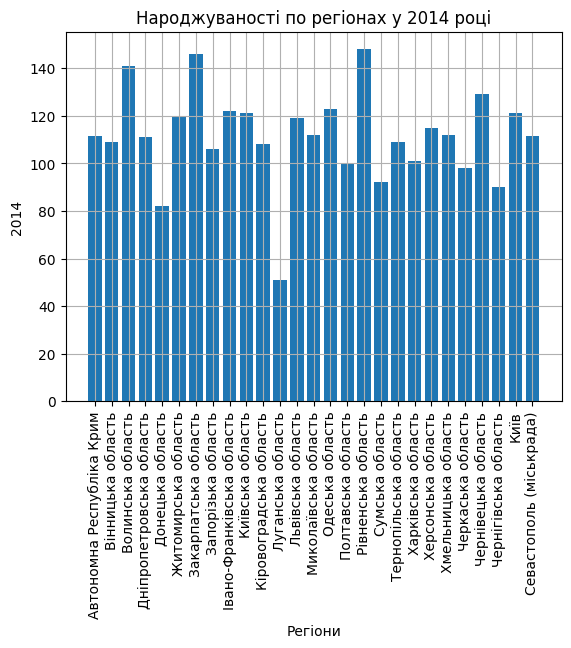

In [111]:
import matplotlib.pyplot as plt

plt.bar(df["регіон"], df["2014"])

plt.xlabel("Pегіони")
plt.ylabel("2014")
plt.title("Народжуваності по регіонах у 2014 році")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

